# Insights of World Population data for year 2007 w.r.t GDP




### Import required library and define constants

In [185]:
import pandas as pd
import os
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Files

In [186]:
globalPopulation = pd.read_csv('DataSets/gapminder.csv')

Fileshape = globalPopulation.shape
Filesize_KB = os.path.getsize('DataSets/gapminder.csv')/1024

print(Fileshape)
print("gapminder.csv: " + str(round(Filesize_KB,2)) + " KB")

(142, 7)
gapminder.csv: 7.68 KB


### Sneak Peak of data

In [187]:
globalPopulation_df = pd.DataFrame(globalPopulation)
globalPopulation_df.head()

,Unnamed: 0,country,year,population,cont,life_exp,gdp_cap
0,11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
1,23,Albania,2007,3600523.0,Europe,76.423,5937.029526
2,35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
3,47,Angola,2007,12420476.0,Africa,42.731,4797.231267
4,59,Argentina,2007,40301927.0,Americas,75.320,12779.379640


In [188]:
pop = globalPopulation_df['population']
np_pop = np.array(pop)/500000
np_cont = np.array(globalPopulation_df['cont'])

col_dict = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'Americas':'yellow',
    'Oceania':'black'
}
col = [col_dict[key] for key in np_cont]

### World Development for 2007

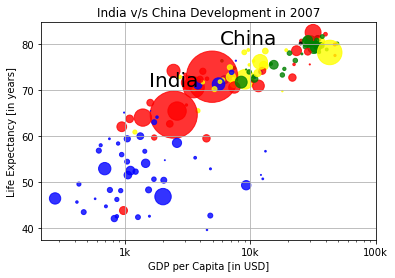

{'Asia': 'red', 'Europe': 'green', 'Africa': 'blue', 'Americas': 'yellow', 'Oceania': 'black'}


In [189]:
plt.scatter(x = globalPopulation_df['gdp_cap'], y = globalPopulation_df['life_exp'], s = np_pop, c = col, alpha = 0.8) 

plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('India v/s China Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

plt.text(1550, 71, 'India', fontsize=20)
plt.text(5700, 80, 'China', fontsize=20)

plt.grid(True)

plt.show()
print(col_dict)

In [198]:
continent_population = {}
continent_gdp = {}
continent = globalPopulation_df['cont']
for index, row in globalPopulation_df.iterrows():
    entry = row['cont']
    if entry in continent_population.keys():
        continent_population[entry] = int((continent_population[entry] + row['population'])/2)
        continent_gdp[entry] = (continent_gdp[entry] + row['gdp_cap'])/2
    else:
        continent_population[entry] = int(row['population'])
        continent_gdp[entry] = row['gdp_cap']

print("\ncontinent_population: "+ str(continent_population) + "\n")
print("continent_gdp: " + str(continent_gdp) +"\n")


continent_population: {'Asia': 28271389, 'Europe': 51142076, 'Africa': 14432469, 'Americas': 52371589, 'Oceania': 12274973}

continent_gdp: {'Asia': 3898.994610044808, 'Europe': 27075.88670493162, 'Africa': 1238.7325741317284, 'Americas': 15668.333454075182, 'Oceania': 29810.188274999997}



In [191]:
continent_population.keys()

dict_keys(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'])

In [192]:
continent_population.values()

dict_values([28271389, 51142076, 14432469, 52371589, 12274973])

#### Average world population in 2007 continent-wise

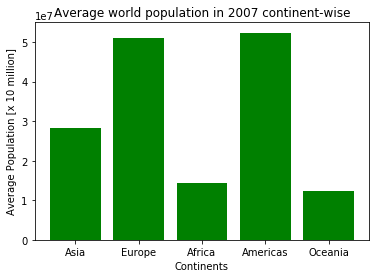

In [196]:
plt.bar(range(len(continent_population)), continent_population.values(), align='center', color = 'green')
plt.xticks(range(len(continent_population)), list(continent_population.keys()))
plt.xlabel('Continents')
plt.ylabel('Average Population [x 10 million]')
plt.title('Average world population in 2007 continent-wise')
plt.show()

#### Average world GDP continent-wise

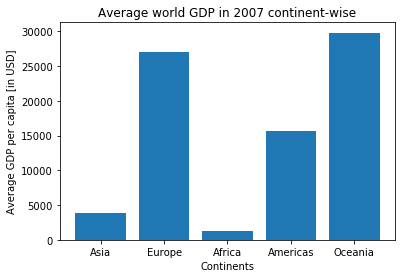

In [194]:
plt.bar(range(len(continent_gdp)), continent_gdp.values(), align='center')
plt.xticks(range(len(continent_gdp)), list(continent_gdp.keys()))
plt.xlabel('Continents')
plt.ylabel('Average GDP per capita [in USD]')
plt.title('Average world GDP in 2007 continent-wise')
plt.show()